###  Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
toyota_corolla = pd.read_csv('ToyotaCorolla.csv')
toyota_corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


### Data Understanding

In [4]:
toyota_corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
toyota_corolla = toyota_corolla[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyota_corolla

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
toyota_corolla.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

## Assumption Check

### 1. Linearity

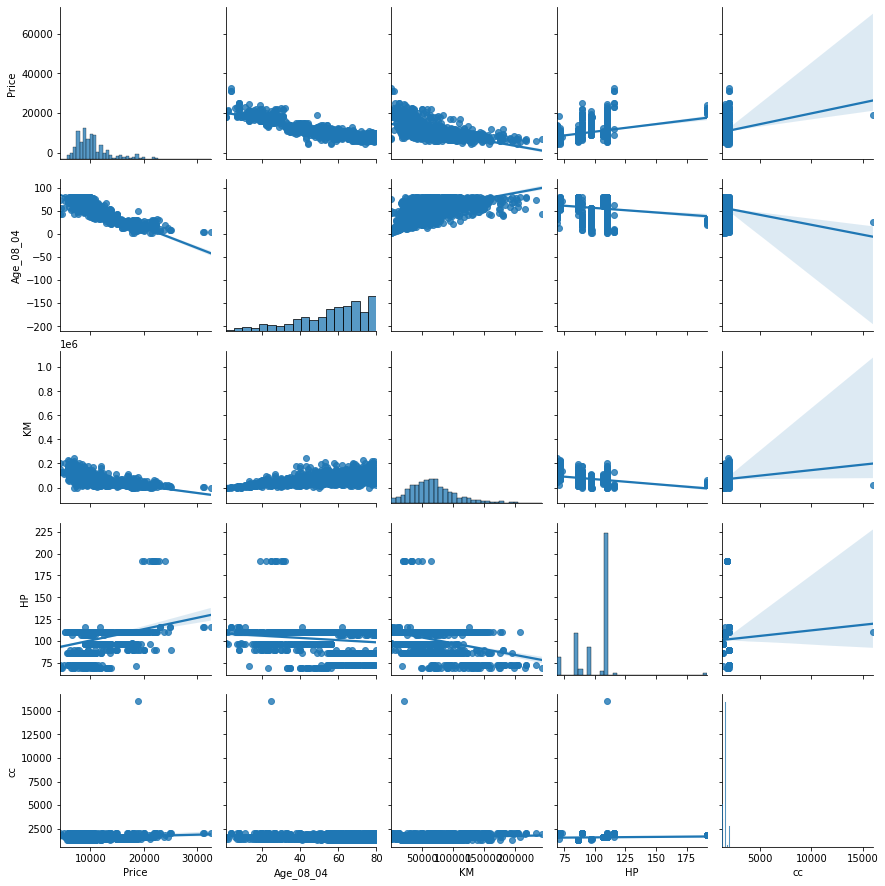

In [7]:
sns.pairplot(toyota_corolla[["Price","Age_08_04","KM","HP",'cc']],kind='reg')
plt.show()

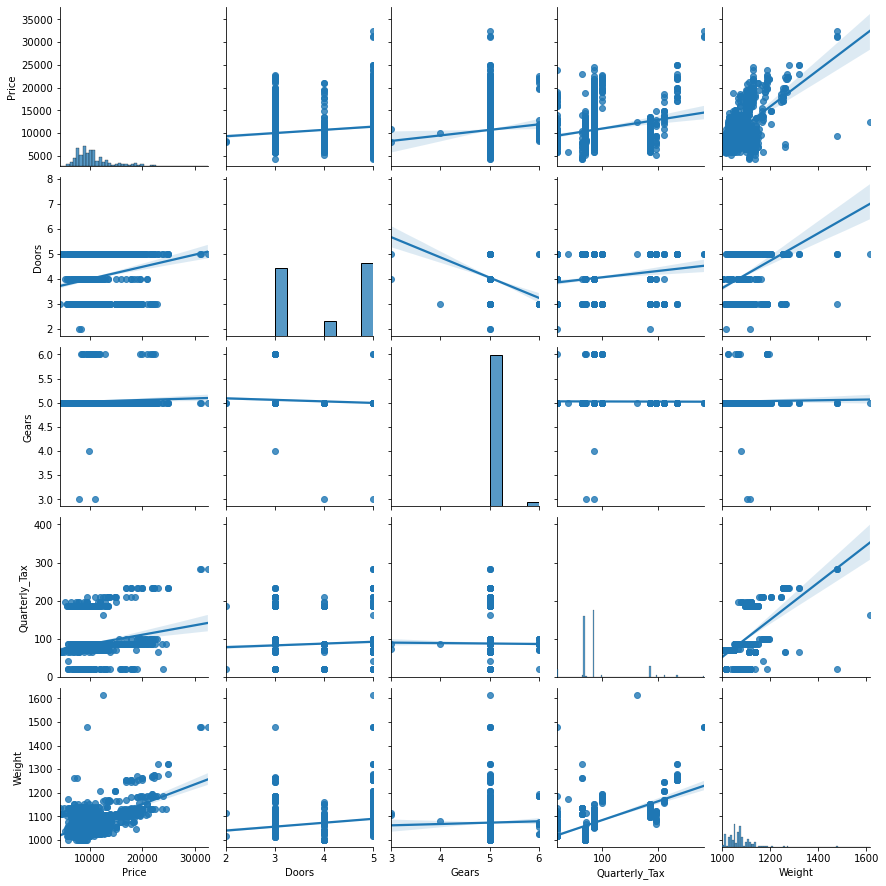

In [8]:
sns.pairplot(toyota_corolla[["Price","Doors","Gears","Quarterly_Tax","Weight"]], kind='reg')
plt.show()

#### OBSERVATION
1. Linearity failed

### 2. Normality check

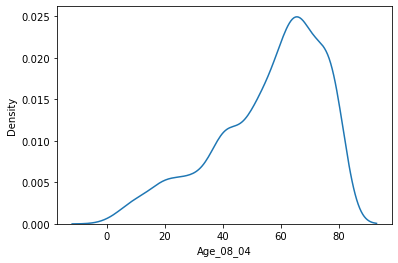

In [9]:
sns.distplot(toyota_corolla.Age_08_04, hist = False)
plt.show()

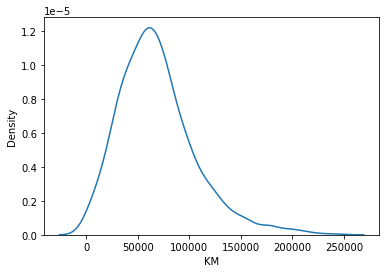

In [10]:
sns.distplot(toyota_corolla.KM, hist = False)
plt.show()

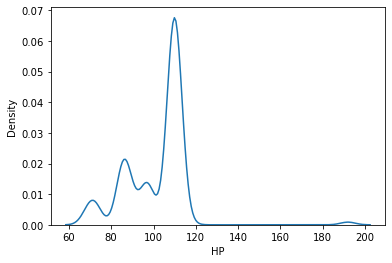

In [11]:
sns.distplot(toyota_corolla.HP, hist = False)
plt.show()

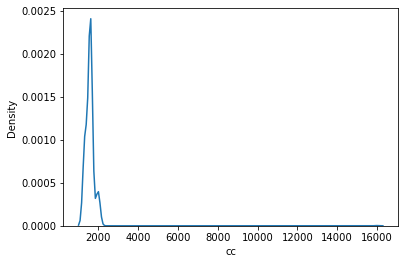

In [12]:
sns.distplot(toyota_corolla.cc, hist = False)
plt.show()

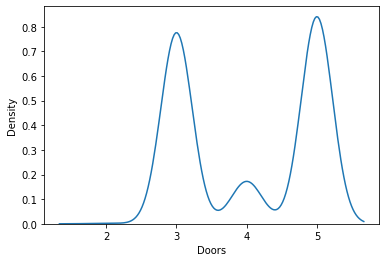

In [13]:
sns.distplot(toyota_corolla.Doors, hist = False)
plt.show()

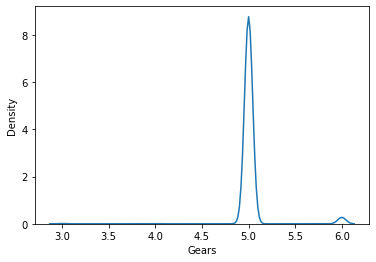

In [14]:
sns.distplot(toyota_corolla.Gears, hist = False)
plt.show()

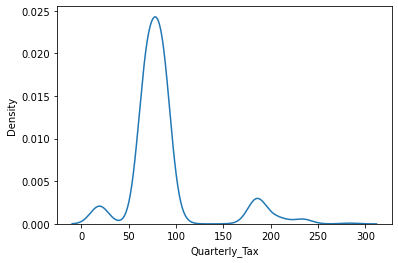

In [15]:
sns.distplot(toyota_corolla.Quarterly_Tax, hist = False)
plt.show()

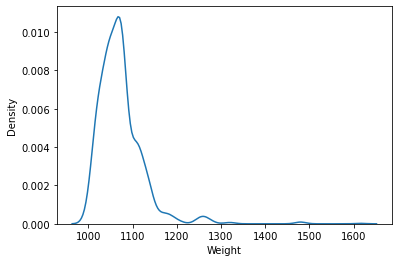

In [16]:
sns.distplot(toyota_corolla.Weight, hist = False)
plt.show()

In [17]:
toyota_corolla.skew()

Price             1.703885
Age_08_04        -0.826702
KM                1.015912
HP                0.955836
cc               27.431793
Doors            -0.076395
Gears             2.283960
Quarterly_Tax     1.993834
Weight            3.108639
dtype: float64

#### OBSERVATION
Normality Failed

### 3. Multicollinearity

In [18]:
toyota_corolla.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<AxesSubplot:>

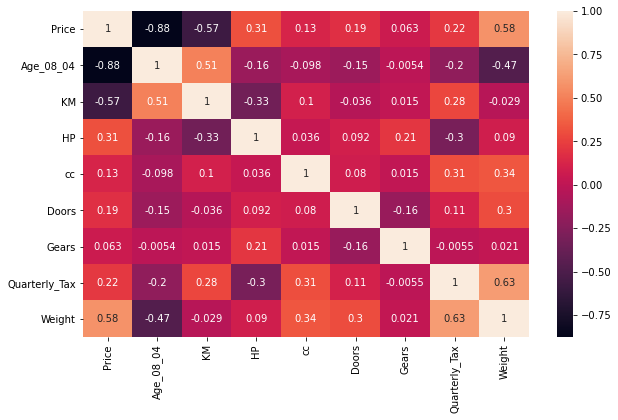

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(toyota_corolla.corr(), data = toyota_corolla, annot=True)

#### Multicollinearity failed

### No Autoregression

### 5. Homoscadascity Check | 6. Zero Residual Mean Check
These 2 tests can be performed post model training

## Model Building

In [20]:
X = toyota_corolla.drop(labels='Price', axis=1)
X

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025
1432,72,19000,86,1300,3,5,69,1015
1433,71,17016,86,1300,3,5,69,1015
1434,70,16916,86,1300,3,5,69,1015


In [21]:
X.mean()

Age_08_04           55.947075
KM               68533.259749
HP                 101.502089
cc                1576.855850
Doors                4.033426
Gears                5.026462
Quarterly_Tax       87.122563
Weight            1072.459610
dtype: float64

In [22]:
X.std()

Age_08_04           18.599988
KM               37506.448872
HP                  14.981080
cc                 424.386770
Doors                0.952677
Gears                0.188510
Quarterly_Tax       41.128611
Weight              52.641120
dtype: float64

In [23]:
from sklearn.preprocessing import StandardScaler
std_scalar = StandardScaler()
scaled_X = std_scalar.fit_transform(X)
scaled_X

array([[-1.77196633, -0.57469494, -0.76804185, ..., -0.14042519,
         2.98867967,  1.75856113],
       [-1.77196633,  0.11745379, -0.76804185, ..., -0.14042519,
         2.98867967,  1.75856113],
       [-1.71818412, -0.71538641, -0.76804185, ..., -0.14042519,
         2.98867967,  1.75856113],
       ...,
       [ 0.80957948, -1.37403589, -1.03513832, ..., -0.14042519,
        -0.44078503, -1.09191497],
       [ 0.75579727, -1.37670303, -1.03513832, ..., -0.14042519,
        -0.44078503, -1.09191497],
       [ 1.0784905 , -1.82784925,  0.5674405 , ..., -0.14042519,
        -1.65690726,  0.78939926]])

In [24]:
scaled_X = pd.DataFrame(data = scaled_X, columns=["Age","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"])

In [25]:
scaled_X.mean()

Age             -2.536349e-15
KM               3.064710e-16
HP               7.216450e-16
cc               1.263628e-15
Doors           -2.610106e-16
Gears            2.557147e-16
Quarterly_Tax   -5.575855e-16
Weight          -2.491353e-15
dtype: float64

In [26]:
scaled_X.std()

Age              1.000348
KM               1.000348
HP               1.000348
cc               1.000348
Doors            1.000348
Gears            1.000348
Quarterly_Tax    1.000348
Weight           1.000348
dtype: float64

In [27]:
y = toyota_corolla[['Price']]
y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


### split data into train , test

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.4, random_state=12)

In [30]:

X_train

,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
386,-0.158500,1.999812,-2.170298,0.761703,1.014941,-0.140425,2.380619,1.283482
1427,0.809579,-1.054406,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-0.521820
263,-0.857669,-0.477238,0.567440,0.054555,1.014941,-0.140425,-0.051626,0.048275
1052,1.078490,3.282892,-1.969976,0.997419,1.014941,-0.140425,2.380619,1.473514
1236,1.186055,0.377180,-1.035138,-0.652594,-1.085139,-0.140425,-0.440785,-1.091915
...,...,...,...,...,...,...,...,...
432,-0.104718,0.356643,0.567440,0.054555,1.014941,-0.140425,-1.656907,0.618371
1283,1.078490,0.122228,0.567440,0.054555,1.014941,-0.140425,-0.051626,0.048275
1265,1.186055,0.178505,0.567440,0.054555,-0.035099,-0.140425,-0.440785,-0.711851
1277,1.239837,0.148286,0.567440,0.054555,1.014941,-0.140425,-0.051626,0.048275


In [31]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = lin_model.predict(X_test)

In [33]:
error = y_test - y_pred
error

,Price
341,-1301.425718
987,1165.842560
1353,-275.705652
39,-614.812532
1181,504.789161
...,...
793,-1150.385699
1058,4839.343303
1395,1125.972869
396,667.278283


### 5. Homoscadascity Check

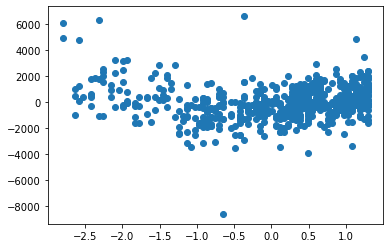

In [34]:
plt.scatter(x = X_test['Age'],y = error)
plt.show()

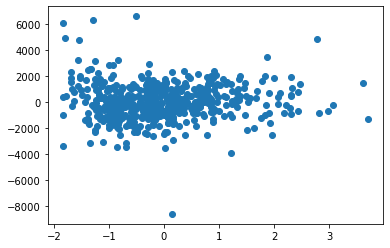

In [35]:
plt.scatter(x = X_test['KM'],y = error)
plt.show()

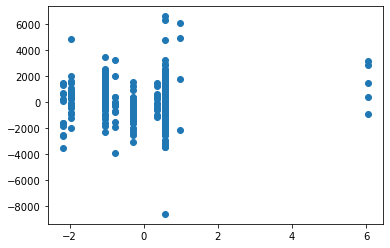

In [36]:
plt.scatter(x = X_test['HP'],y = error)
plt.show()

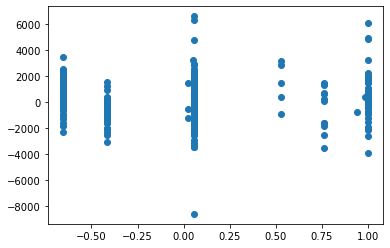

In [37]:
plt.scatter(x = X_test['cc'],y = error)
plt.show()

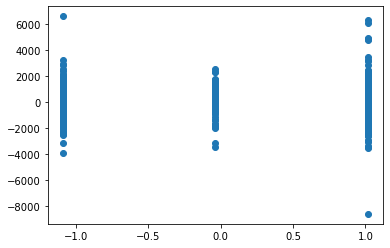

In [38]:
plt.scatter(x = X_test['Doors'],y = error)
plt.show()

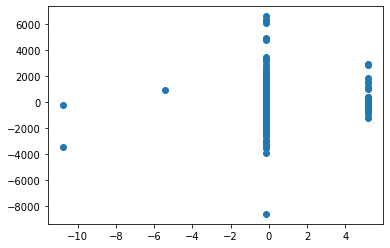

In [39]:
plt.scatter(x = X_test['Gears'],y = error)
plt.show()

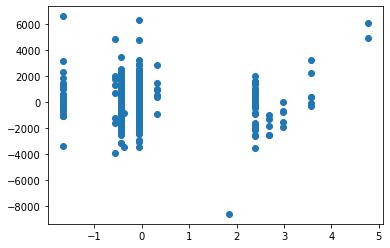

In [40]:
plt.scatter(x = X_test['Quarterly_Tax'],y = error)
plt.show()

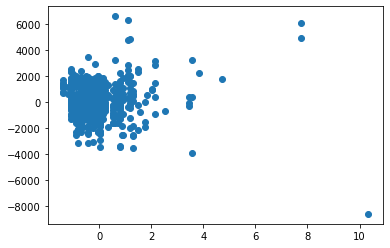

In [41]:
plt.scatter(x = X_test['Weight'],y = error)
plt.show()

#### OBSERVATION
Homoscadascity **failed**

### Zero Residual Mean test

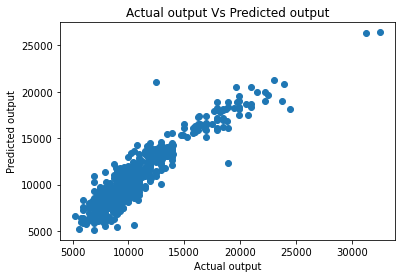

In [42]:
plt.scatter(x = y_test, y = y_pred)
plt.title('Actual output Vs Predicted output')
plt.xlabel('Actual output')
plt.ylabel('Predicted output')
plt.show()

<AxesSubplot:ylabel='Density'>

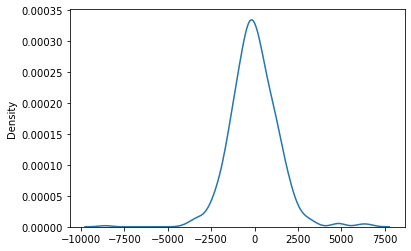

In [43]:
sns.distplot(a = error, hist=False)

##### OBSERVATION
* zero residual mean **passed**